<a href="https://colab.research.google.com/github/62wyp/Assignment/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
import csv
def input_and_save_data_to_csv():
  with open('consume_energy.csv', mode='w', newline='')as file:
      writer = csv.writer(file)
      writer.writerow(['Month','Electricity', 'Gas', 'Water'])

      print("Please enter monthly energy consumption data")
      for month in ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]:
          print(f"\n{month}:")
          electricity = input("Electricity usage(kWh):")
          gas = input("Gas usage(cubic meters):")
          water = input("Water usage(liters):")

          writer.writerow([month,electricity,gas,water])
      print("\nData entryis complete and has been saved to CSV.")

input_and_save_data_to_csv()



Please enter monthly energy consumption data

Jan:



Select an option:
1. Monthly Trends
2. Comparison of Energy Consumption by Type
3. Total Consumption Breakdown by Energy Type
Enter your choice (1/2/3): 2


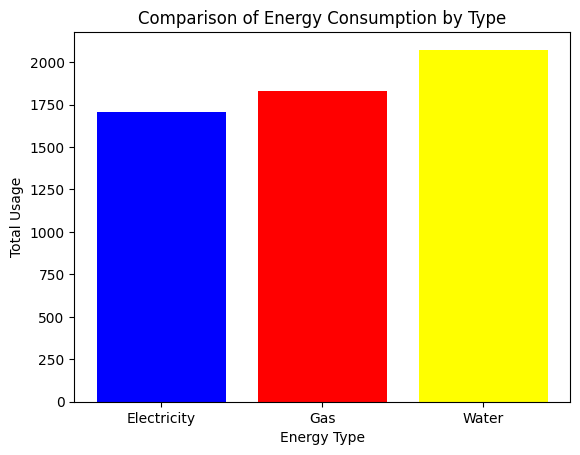

In [ ]:

def read_data_from_csv():
    energy_data = {}
    with open('consume_energy.csv', mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            month = row['Month']
            energy_data[month] = {
                'Electricity': float(row['Electricity']),
                'Gas': float(row['Gas']),
                'Water': float(row['Water'])
            }
    return energy_data


def plot_monthly_consumption_trends(data):
    months = list(data.keys())
    electricity = [data[month]['Electricity'] for month in months]
    gas = [data[month]['Gas'] for month in months]
    water = [data[month]['Water'] for month in months]


    plt.plot(months, electricity, label='Electricity')
    plt.plot(months, gas, label='Gas')
    plt.plot(months, water, label='Water')
    plt.title('Monthly Trends')
    plt.xlabel('Month')
    plt.ylabel('Usage')
    plt.show()


def compare_energy_types(data):
    energy_types = ['Electricity', 'Gas', 'Water']
    total_usage = {energy: sum(data[month][energy]for month in data)for energy in energy_types}


    plt.bar(total_usage.keys(), total_usage.values(), color=['blue', 'red', 'yellow'])
    plt.title('Comparison of Energy Consumption by Type')
    plt.xlabel('Energy Type')
    plt.ylabel('Total Usage')
    plt.show()


def plot_consumption_breakdown(data):
    energy_types = ['Electricity', 'Gas', 'Water']
    total_usage = [sum(data[month][energy] for month in data) for energy in energy_types]


    plt.pie(total_usage, labels=energy_types, autopct='%1.1f%%',startangle=140)
    plt.title('Total Consumption Breakdown by Energy Type')
    plt.show()


def main_menu():
    energy_data = read_data_from_csv()


    print("\nSelect an option:")
    print("1. Monthly Trends")
    print("2. Comparison of Energy Consumption by Type")
    print("3. Total Consumption Breakdown by Energy Type")
    choice = input("Enter your choice (1/2/3): ")


    if choice == '1':
        plot_monthly_consumption_trends(energy_data)
    elif choice == '2':
        compare_energy_types(energy_data)
    elif choice == '3':
        plot_annual_consumption_breakdown(energy_data)
    else:
        print("Invalid choice. Please enter 1, 2, or 3.")

main_menu()
